## Scale Features and Build Model
### Scales Raw Features

Import CSV of Aggregated Darshan Logs <br>
Apply Log10 and Percent Scaling

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./raws.csv")
#df.mean()

In [3]:
df = df.drop(df.columns[0],axis = 1)
df = df.drop(df.columns[0],axis = 1)
f = pd.DataFrame()

In [4]:
df

,posix_read_time,posix_write_time,posix_meta_time,posix_bytes_read,posix_bytes_read_100,posix_bytes_read_1K,posix_bytes_read_10K,posix_bytes_read_100K,posix_bytes_read_1lM,posix_bytes_read_4M,...,posix_m_align,lustre_number_of_files,lustre_mdts,lustre_osts,lustre_stripe_size,lustre_stripe_offset,lustre_stripe_width,lustre_number_of_osts,jobid,path
0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,36.000000,1048576.0,0.0,4.0,4.0,9042391.0,../results/USER375904U_sss2_id9042391_9-26-414...
1,104.611641,10.024055,20.060841,2.390891e+10,147688.0,141853.0,33215.0,261267.0,51049.0,0.0,...,13704.0,176.0,1.0,360.000000,1048576.0,0.0,176.0,147.0,9868242.0,../results/USER382862U_SpEC_id9868242_4-29-741...
2,124.560730,42.051125,54.839272,5.019637e+10,332059.0,684893.0,130143.0,919688.0,2515.0,0.0,...,6704.0,224.0,1.0,360.000000,1048576.0,0.0,224.0,186.0,9029683.0,../results/USER264205U_SpEC_id9029683_9-20-580...
3,25763.292969,582.297363,24.895737,5.488943e+12,30785.0,767.0,508381.0,2040.0,13683.0,626216.0,...,2320.0,290.0,1.0,54.993103,1048576.0,0.0,290.0,52.0,9165166.0,../results/USER341996U_CCTM_v52_Linux2_x86_64i...
4,154.534821,681.548279,658.484985,2.293203e+10,588029.0,2926599.0,425127.0,336133.0,98.0,0.0,...,6328.0,201.0,1.0,360.000000,1048576.0,0.0,201.0,158.0,8269019.0,../results/USER141481U_SpEC_id8269019_3-3-4542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875282,138.354477,82.278084,194.485565,5.593977e+10,216146.0,535152.0,99814.0,889010.0,12485.0,0.0,...,9920.0,124.0,1.0,360.000000,1048576.0,0.0,124.0,110.0,7759072.0,../results/USER336298U_SpEC_id7759072_10-30-62...
875283,54.443073,231.440857,25.271391,1.465277e+09,3099.0,0.0,180662.0,0.0,0.0,0.0,...,8704.0,1088.0,1.0,360.000000,1048576.0,0.0,1088.0,359.0,7275819.0,../results/USER331454U_pw.x_id7275819_8-2-4790...
875284,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,36.000000,1048576.0,0.0,5.0,5.0,8305062.0,../results/USER371284U_sss2_id8305062_3-14-211...
875285,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,1.0,36.000000,1048576.0,0.0,2.0,1.0,31428.0,../results/USER303986U_testnodes_opt.x_id31428...


In [5]:

df = df.dropna(axis=0, how='any')
df

,posix_read_time,posix_write_time,posix_meta_time,posix_bytes_read,posix_bytes_read_100,posix_bytes_read_1K,posix_bytes_read_10K,posix_bytes_read_100K,posix_bytes_read_1lM,posix_bytes_read_4M,...,posix_m_align,lustre_number_of_files,lustre_mdts,lustre_osts,lustre_stripe_size,lustre_stripe_offset,lustre_stripe_width,lustre_number_of_osts,jobid,path
0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,36.000000,1048576.0,0.0,4.0,4.0,9042391.0,../results/USER375904U_sss2_id9042391_9-26-414...
1,104.611641,10.024055,20.060841,2.390891e+10,147688.0,141853.0,33215.0,261267.0,51049.0,0.0,...,13704.0,176.0,1.0,360.000000,1048576.0,0.0,176.0,147.0,9868242.0,../results/USER382862U_SpEC_id9868242_4-29-741...
2,124.560730,42.051125,54.839272,5.019637e+10,332059.0,684893.0,130143.0,919688.0,2515.0,0.0,...,6704.0,224.0,1.0,360.000000,1048576.0,0.0,224.0,186.0,9029683.0,../results/USER264205U_SpEC_id9029683_9-20-580...
3,25763.292969,582.297363,24.895737,5.488943e+12,30785.0,767.0,508381.0,2040.0,13683.0,626216.0,...,2320.0,290.0,1.0,54.993103,1048576.0,0.0,290.0,52.0,9165166.0,../results/USER341996U_CCTM_v52_Linux2_x86_64i...
4,154.534821,681.548279,658.484985,2.293203e+10,588029.0,2926599.0,425127.0,336133.0,98.0,0.0,...,6328.0,201.0,1.0,360.000000,1048576.0,0.0,201.0,158.0,8269019.0,../results/USER141481U_SpEC_id8269019_3-3-4542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875282,138.354477,82.278084,194.485565,5.593977e+10,216146.0,535152.0,99814.0,889010.0,12485.0,0.0,...,9920.0,124.0,1.0,360.000000,1048576.0,0.0,124.0,110.0,7759072.0,../results/USER336298U_SpEC_id7759072_10-30-62...
875283,54.443073,231.440857,25.271391,1.465277e+09,3099.0,0.0,180662.0,0.0,0.0,0.0,...,8704.0,1088.0,1.0,360.000000,1048576.0,0.0,1088.0,359.0,7275819.0,../results/USER331454U_pw.x_id7275819_8-2-4790...
875284,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,36.000000,1048576.0,0.0,5.0,5.0,8305062.0,../results/USER371284U_sss2_id8305062_3-14-211...
875285,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,1.0,36.000000,1048576.0,0.0,2.0,1.0,31428.0,../results/USER303986U_testnodes_opt.x_id31428...


In [6]:
#files
f['p_files'] = df['posix_number_of_files']  + 1

In [7]:
#accesses
df['p_accesses'] = df['posix_reads'] + df['posix_writes']
f['p_accesses'] = df['p_accesses']

f['p_accesses']

0               0.0
1          880136.0
2         2379598.0
3         8903411.0
4         7846387.0
            ...    
875282    2234152.0
875283     197651.0
875284          0.0
875285          0.0
875286    6065006.0
Name: p_accesses, Length: 875287, dtype: float64

In [8]:
#bytes
f['log10_p_bytes'] = df['posix_bytes_read'] 

In [9]:
f['log10_p_opens'] = df['posix_opens']
f['log10_p_seeks'] = df['posix_seeks']
f['log10_p_stats'] = df['posix_stats']
f['log10_p_mode'] = df['posix_renamed_mode']

In [10]:
f['log10_p_nprocs'] = np.log10(df['nprocs'])
f['log10_p_falign'] = np.log10(df['posix_f_align'])
f['log10_p_malign'] = np.log10(df['posix_m_align'])

/Users/dave/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
f['p_reads'] = df['posix_reads'] 
f['p_writes'] = df['posix_writes'] 

In [12]:
df['histogram_r_sum'] = df['posix_bytes_read_100'] + df['posix_bytes_read_1K'] + \
df['posix_bytes_read_4M'] + df['posix_bytes_read_10M'] + df['posix_bytes_read_100M'] +\
df['posix_bytes_read_1G'] + df['posix_bytes_read_PLUS']

f['perc_p_bytes_read_100'] = df['posix_bytes_read_100']
f['perc_p_bytes_read_1K'] = df['posix_bytes_read_1K'] 
f['perc_p_bytes_read_10K'] = df['posix_bytes_read_10K']
f['perc_p_bytes_read_100K'] = df['posix_bytes_read_100K']
f['perc_p_bytes_read_1M'] = df['posix_bytes_read_1lM']
f['perc_p_bytes_read_4M'] = df['posix_bytes_read_4M']
f['perc_p_bytes_read_10M'] = df['posix_bytes_read_10M']
f['perc_p_bytes_read_100M'] = df['posix_bytes_read_100M']
f['perc_p_bytes_read_1G'] = df['posix_bytes_read_1G']
f['perc_p_bytes_read_PLUS'] = df['posix_bytes_read_PLUS']

In [13]:
df['histogram_w_sum'] = df['posix_bytes_write_100'] + df['posix_bytes_write_1K'] + \
df['posix_bytes_write_10K'] + df['posix_bytes_write_100K'] + df['posix_bytes_write_1M'] +\
df['posix_bytes_write_4M'] + df['posix_bytes_write_10M'] + df['posix_bytes_write_100M'] +\
df['posix_bytes_write_1G'] + df['posix_bytes_write_PLUS']

f['perc_p_bytes_write_100'] = df['posix_bytes_write_100']
f['perc_p_bytes_write_1K'] = df['posix_bytes_write_1K']
f['perc_p_bytes_write_10K'] = df['posix_bytes_write_10K']
f['perc_p_bytes_write_100K'] = df['posix_bytes_write_100K']
f['perc_p_bytes_write_1M'] = df['posix_bytes_write_1M']
f['perc_p_bytes_write_4M'] = df['posix_bytes_write_4M']
f['perc_p_bytes_write_10M'] = df['posix_bytes_write_10M']
f['perc_p_bytes_write_100M'] = df['posix_bytes_write_100M']
f['perc_p_bytes_write_1G'] = df['posix_bytes_write_1G']
f['perc_p_bytes_write_PLUS'] = df['posix_bytes_write_PLUS'] 


f = f.replace(-np.inf, -1)
f = f.replace(np.nan, 0)


In [14]:
df['time'] = df['posix_write_time'] + df['posix_read_time'] + df['posix_meta_time']
df['bytes'] = df['posix_bytes_read'] + df['posix_bytes_write']

t = pd.DataFrame()
f['throughput'] = df['bytes'] / df['time']

In [15]:
#delete columns with all zeros
f = f.loc[:, (f != 0).any(axis=0)]

#remove infinite values
f = f.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

f.max()

p_files                    1.340070e+05
p_accesses                 2.251942e+10
log10_p_bytes              3.038456e+14
log10_p_opens              5.531094e+08
log10_p_seeks              1.445220e+10
log10_p_stats              6.522921e+07
log10_p_mode               5.337293e+07
log10_p_nprocs             5.719570e+00
log10_p_falign             1.115306e+01
log10_p_malign             6.035555e+00
p_reads                    2.237846e+10
p_writes                   1.302770e+10
perc_p_bytes_read_100      5.221517e+08
perc_p_bytes_read_1K       2.074657e+10
perc_p_bytes_read_10K      1.536278e+09
perc_p_bytes_read_100K     1.515506e+08
perc_p_bytes_read_1M       4.044503e+08
perc_p_bytes_read_4M       6.561462e+07
perc_p_bytes_read_10M      2.083200e+06
perc_p_bytes_read_100M     2.872090e+05
perc_p_bytes_read_1G       1.792000e+06
perc_p_bytes_write_100     1.302770e+10
perc_p_bytes_write_1K      2.852127e+09
perc_p_bytes_write_10K     3.867477e+08
perc_p_bytes_write_100K    8.347452e+07


In [16]:
t['throughput'] = f['throughput']
f = f.drop(labels = 'throughput', axis = 1)
f

,p_files,p_accesses,log10_p_bytes,log10_p_opens,log10_p_seeks,log10_p_stats,log10_p_mode,log10_p_nprocs,log10_p_falign,log10_p_malign,...,perc_p_bytes_read_1G,perc_p_bytes_write_100,perc_p_bytes_write_1K,perc_p_bytes_write_10K,perc_p_bytes_write_100K,perc_p_bytes_write_1M,perc_p_bytes_write_4M,perc_p_bytes_write_10M,perc_p_bytes_write_100M,perc_p_bytes_write_1G
1,800.0,880136.0,2.390891e+10,8858.0,319241.0,34901.0,37230.0,1.681241,9.254357,4.136847,...,0.0,202780.0,16078.0,21989.0,3156.0,1061.0,0.0,0.0,0.0,0.0
2,361.0,2379598.0,5.019637e+10,62398.0,1107764.0,270222.0,27594.0,1.681241,8.943844,3.826334,...,0.0,18852.0,264906.0,22246.0,4282.0,14.0,0.0,0.0,0.0,0.0
3,291.0,8903411.0,5.488943e+12,8711.0,2010273.0,28432.0,115194.0,2.408240,8.482998,3.365488,...,0.0,7302089.0,52045.0,73.0,9.0,25830.0,756.0,0.0,0.0,0.0
4,320.0,7846387.0,2.293203e+10,23158.0,6015926.0,400399.0,31536.0,1.681241,8.918776,3.801266,...,0.0,489873.0,2821931.0,240372.0,17983.0,242.0,0.0,0.0,0.0,0.0
5,145.0,0.0,0.000000e+00,0.0,0.0,176.0,0.0,1.505150,8.178962,3.061452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875280,2.0,57344.0,3.006477e+10,1808.0,59128.0,12.0,0.0,2.049218,6.020600,0.903090,...,0.0,0.0,0.0,0.0,0.0,28672.0,0.0,0.0,0.0,0.0
875281,14.0,102439.0,7.467916e+08,193.0,91.0,385.0,4818.0,1.505150,7.134543,2.017033,...,0.0,33.0,23.0,10927.0,0.0,0.0,0.0,0.0,0.0,0.0
875282,625.0,2234152.0,5.593977e+10,35112.0,1035457.0,159180.0,16644.0,1.505150,9.114022,3.996512,...,0.0,51807.0,397643.0,27690.0,3198.0,1207.0,0.0,0.0,0.0,0.0
875283,1089.0,197651.0,1.465277e+09,2112.0,12509.0,4198.0,473916.0,2.709270,9.057229,3.939719,...,0.0,28.0,0.0,38.0,0.0,13824.0,0.0,0.0,0.0,0.0


In [17]:

from sklearn.preprocessing import StandardScaler
f = StandardScaler().fit_transform(f)

In [18]:
t.max()

throughput    2.344536e+09
dtype: float64

In [19]:
print(t.min())
print(t.max())

throughput    0.0
dtype: float64
throughput    2.344536e+09
dtype: float64


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
rseed = 0
t_size = 0.1

for i in range(3):
    
    rseed = random.randint(1,10000)
    print(rseed)
    train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size=t_size, random_state=rseed)

    reg = LinearRegression().fit(train_data, train_labels)

    predicted_labels = reg.predict(test_data)

    print("Mean True Value: \t",int(test_labels.mean() ))
    print("Mean Absolute Error: \t", int(mean_absolute_error(test_labels, predicted_labels) ))
    print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
    print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
    print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
    print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")
    
    

2825
Mean True Value: 	 80247938
Mean Absolute Error: 	 51128803
Mean Squared Error:  8049291975754185.0
Root Mean Squared Error:  89717846.47300772
MAPE :9.48740052737349e+21
R2: 0.3157999993460463

3696
Mean True Value: 	 79774347
Mean Absolute Error: 	 50994053
Mean Squared Error:  8398636528105234.0
Root Mean Squared Error:  91644075.24824086
MAPE :9.669046250027161e+21
R2: 0.2813313403030343

3650
Mean True Value: 	 80041315
Mean Absolute Error: 	 50781597
Mean Squared Error:  7814574077175511.0
Root Mean Squared Error:  88400079.62199758
MAPE :9.067264526818159e+21
R2: 0.32493823392307575



In [22]:
#EXTREME GRADIENT BOOST
import xgboost as xg
for i in range(3):
    rseed = random.randint(1,10000)
    print(rseed)

    train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size=t_size, random_state=rseed)
    xgb_r = xg.XGBRegressor(n_estimators = 1000, seed = 123)
    xgb_r.fit(train_data, train_labels)
    predicted_labels = xgb_r.predict(test_data)

    print("Mean True Value: \t",int(test_labels.mean() ))
    print("Mean Absolute Error: \t", int(mean_absolute_error(test_labels, predicted_labels) ))
    print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
    print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
    print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
    print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")
    

4291
Mean True Value: 	 79671972
Mean Absolute Error: 	 15775270
Mean Squared Error:  1182917720629453.5
Root Mean Squared Error:  34393570.92000558
MAPE :5.928271388112404e+19
R2: 0.8964572242755775

5005
Mean True Value: 	 79970693
Mean Absolute Error: 	 15753294
Mean Squared Error:  1171118466969232.2
Root Mean Squared Error:  34221608.18794512
MAPE :7.529020324371345e+19
R2: 0.9001025528311228

1952
Mean True Value: 	 80010257
Mean Absolute Error: 	 15694609
Mean Squared Error:  1167859298304569.8
Root Mean Squared Error:  34173956.43329244
MAPE :7.649769608686325e+19
R2: 0.9004918036900794



In [23]:
from sklearn.tree import DecisionTreeRegressor

for i in range(3):
    rseed = random.randint(1,10000)
    print(rseed)

    train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size= t_size, random_state=rseed)
    
    
    reg = DecisionTreeRegressor(max_depth = 4)   
    

    reg.fit(train_data, train_labels)
    predicted_labels = reg.predict(test_data)


    print("Mean True Value: \t",int(test_labels.mean() ))
    print("Mean Absolute Error: \t", int(mean_absolute_error(test_labels, predicted_labels) ))
    print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
    print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
    print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
    print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")
    
    

9163
Mean True Value: 	 79868453
Mean Absolute Error: 	 33248390
Mean Squared Error:  3218231073977619.5
Root Mean Squared Error:  56729455.08267834
MAPE :7.696365899110741e+21
R2: 0.721500661764336

3420
Mean True Value: 	 79722234
Mean Absolute Error: 	 33700230
Mean Squared Error:  3251758114891718.5
Root Mean Squared Error:  57024188.8578147
MAPE :7.824038340112399e+21
R2: 0.7186109537851515

5522
Mean True Value: 	 80104539
Mean Absolute Error: 	 33107125
Mean Squared Error:  3156004880382560.0
Root Mean Squared Error:  56178331.05729076
MAPE :7.758545262697204e+21
R2: 0.7284183849924653



NameError: name 'x' is not defined

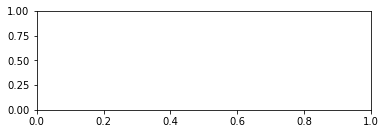

In [ ]:


t_size = 0.2
rseed = 1
train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size=t_size, random_state=rseed)

new_length = 500

new_x = np.linspace(train_data.min(), train_data.max(), new_length)
print((train_data.shape))
print((train_labels.shape))